<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Evaluation-Procedure" data-toc-modified-id="Evaluation-Procedure-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation Procedure</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Normalization</a></span></li><li><span><a href="#Train-/-Test-Split" data-toc-modified-id="Train-/-Test-Split-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train / Test Split</a></span></li><li><span><a href="#Working-with-models" data-toc-modified-id="Working-with-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Working with models</a></span><ul class="toc-item"><li><span><a href="#Model-0---Constant" data-toc-modified-id="Model-0---Constant-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Model 0 - Constant</a></span></li><li><span><a href="#Model-1---NLTK,-TF-IDF-and-LR" data-toc-modified-id="Model-1---NLTK,-TF-IDF-and-LR-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Model 1 - NLTK, TF-IDF and LR</a></span></li><li><span><a href="#Model-2---NLTK,-TF-IDF-and-LightGBM-Classifier" data-toc-modified-id="Model-2---NLTK,-TF-IDF-and-LightGBM-Classifier-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Model 2 - NLTK, TF-IDF and LightGBM Classifier</a></span></li><li><span><a href="#Model-3---spaCy,-TF-IDF-and-LR" data-toc-modified-id="Model-3---spaCy,-TF-IDF-and-LR-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Model 3 - spaCy, TF-IDF and LR</a></span></li><li><span><a href="#Model-4---spaCy,-TF-IDF-and-LGBMClassifier" data-toc-modified-id="Model-4---spaCy,-TF-IDF-and-LGBMClassifier-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Model 4 - spaCy, TF-IDF and LGBMClassifier</a></span></li><li><span><a href="#Model-5---BERT" data-toc-modified-id="Model-5---BERT-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Model 5 - BERT</a></span></li></ul></li><li><span><a href="#My-Reviews" data-toc-modified-id="My-Reviews-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>My Reviews</a></span><ul class="toc-item"><li><span><a href="#Model-1-Logistic-Regression" data-toc-modified-id="Model-1-Logistic-Regression-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Model 1 Logistic Regression</a></span></li><li><span><a href="#Model-2---LightGBM-classifier" data-toc-modified-id="Model-2---LightGBM-classifier-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Model 2 - LightGBM classifier</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

# Project Instructions
- Load the data.
- Preprocess the data, if required.
- Conduct an EDA and make your conclusion on the class imbalance.
- Preprocess the data for modeling.
- Train at least three different models for the given train dataset.
* Test the models for the given test dataset.
- Compose a few of your own reviews and classify them with all the models.
- Check for differences between the testing results of models in the above two points. Try to explain them.
- Present your findings.

## Initialization

In [1]:
import math
import re
import nltk
import spacy
import numpy as np
import pandas as pd
from PIL import Image # converting images into arrays

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# install wordcloud
#!pip install wordcloud 
import lightgbm as lgb

# import PyTorch and transformers libraries
import torch
import transformers

# import package and its set of stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tqdm.auto import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler # for normalizing data

# import metrics
from sklearn import metrics
from sklearn.metrics import f1_score, precision_recall_curve

# import machine learning models
from sklearn.dummy import DummyClassifier # dummy classifier
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.naive_bayes import MultinomialNB # naive bayes classifier
from lightgbm import LGBMClassifier # lightGBM classifier
from sklearn.linear_model import SGDClassifier # stochastic gradient classifier

import sys
import warnings # ignore warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Data Preprocessing

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
def display_information(df):
    print('Head:')
    print()
    display(df.head(5))
    print('Tail:')
    print()
    display(df.tail(5))
    print('Info:')
    print()
    display(df.info())
    print('Describe:')
    print()
    display(df.describe())
    print('Skew Factor')
    print(df.skew())
    print('Columns with nulls:')
    display(get_percent_of_na_df(df,4))
    print('Shape:')
    print(df.shape)
    print('Duplicated:')
    print('Duplicate rows:', df.duplicated().sum(), ', Duplicate percentage:', (df.duplicated().sum() * 100 ) /df.shape[0],'%')
    
def get_percent_of_na_df(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls

In [6]:
display_information(df_reviews)


Head:



,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


Tail:



,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
47326,tt0068398,tvEpisode,Étude in Black,Étude in Black,1972,\N,97,0,"Crime,Drama,Mystery",7.7,2254,This is another of my favorite Columbos. It sp...,10,pos,1,test,6038
47327,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Talk about being boring! I got this expecting ...,4,neg,0,test,989
47328,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,"I never thought I'd say this about a biopic, b...",8,pos,1,test,4163
47329,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Spirit and Chaos is an artistic biopic of Miya...,9,pos,1,test,4164
47330,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,I'll make this brief. This was a joy to watch....,10,pos,1,test,4165


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: In

None

Describe:



,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,4.732900e+04,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,2.556292e+04,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,8.367004e+04,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


Skew Factor
start_year        -1.566152
is_adult          23.963419
average_rating    -0.662190
votes              7.813169
rating            -0.002901
pos                0.004183
idx               -0.010661
dtype: float64
Columns with nulls:


,Missing Values,Percent of Nulls
tconst,0,0.0
title_type,0,0.0
primary_title,0,0.0
original_title,0,0.0
start_year,0,0.0
end_year,0,0.0
runtime_minutes,0,0.0
is_adult,0,0.0
genres,0,0.0
average_rating,2,0.0


Shape:
(47331, 17)
Duplicated:
Duplicate rows: 0 , Duplicate percentage: 0.0 %


### Conclusion

The dataset consists of 47331 rows and 17 columns. The review column contains 47331 entries with a datatype object. The pos column contains 47331 entries with a datatype int64.



## Exploratory Data Analysis

Let's check the number of movies and reviews over years.

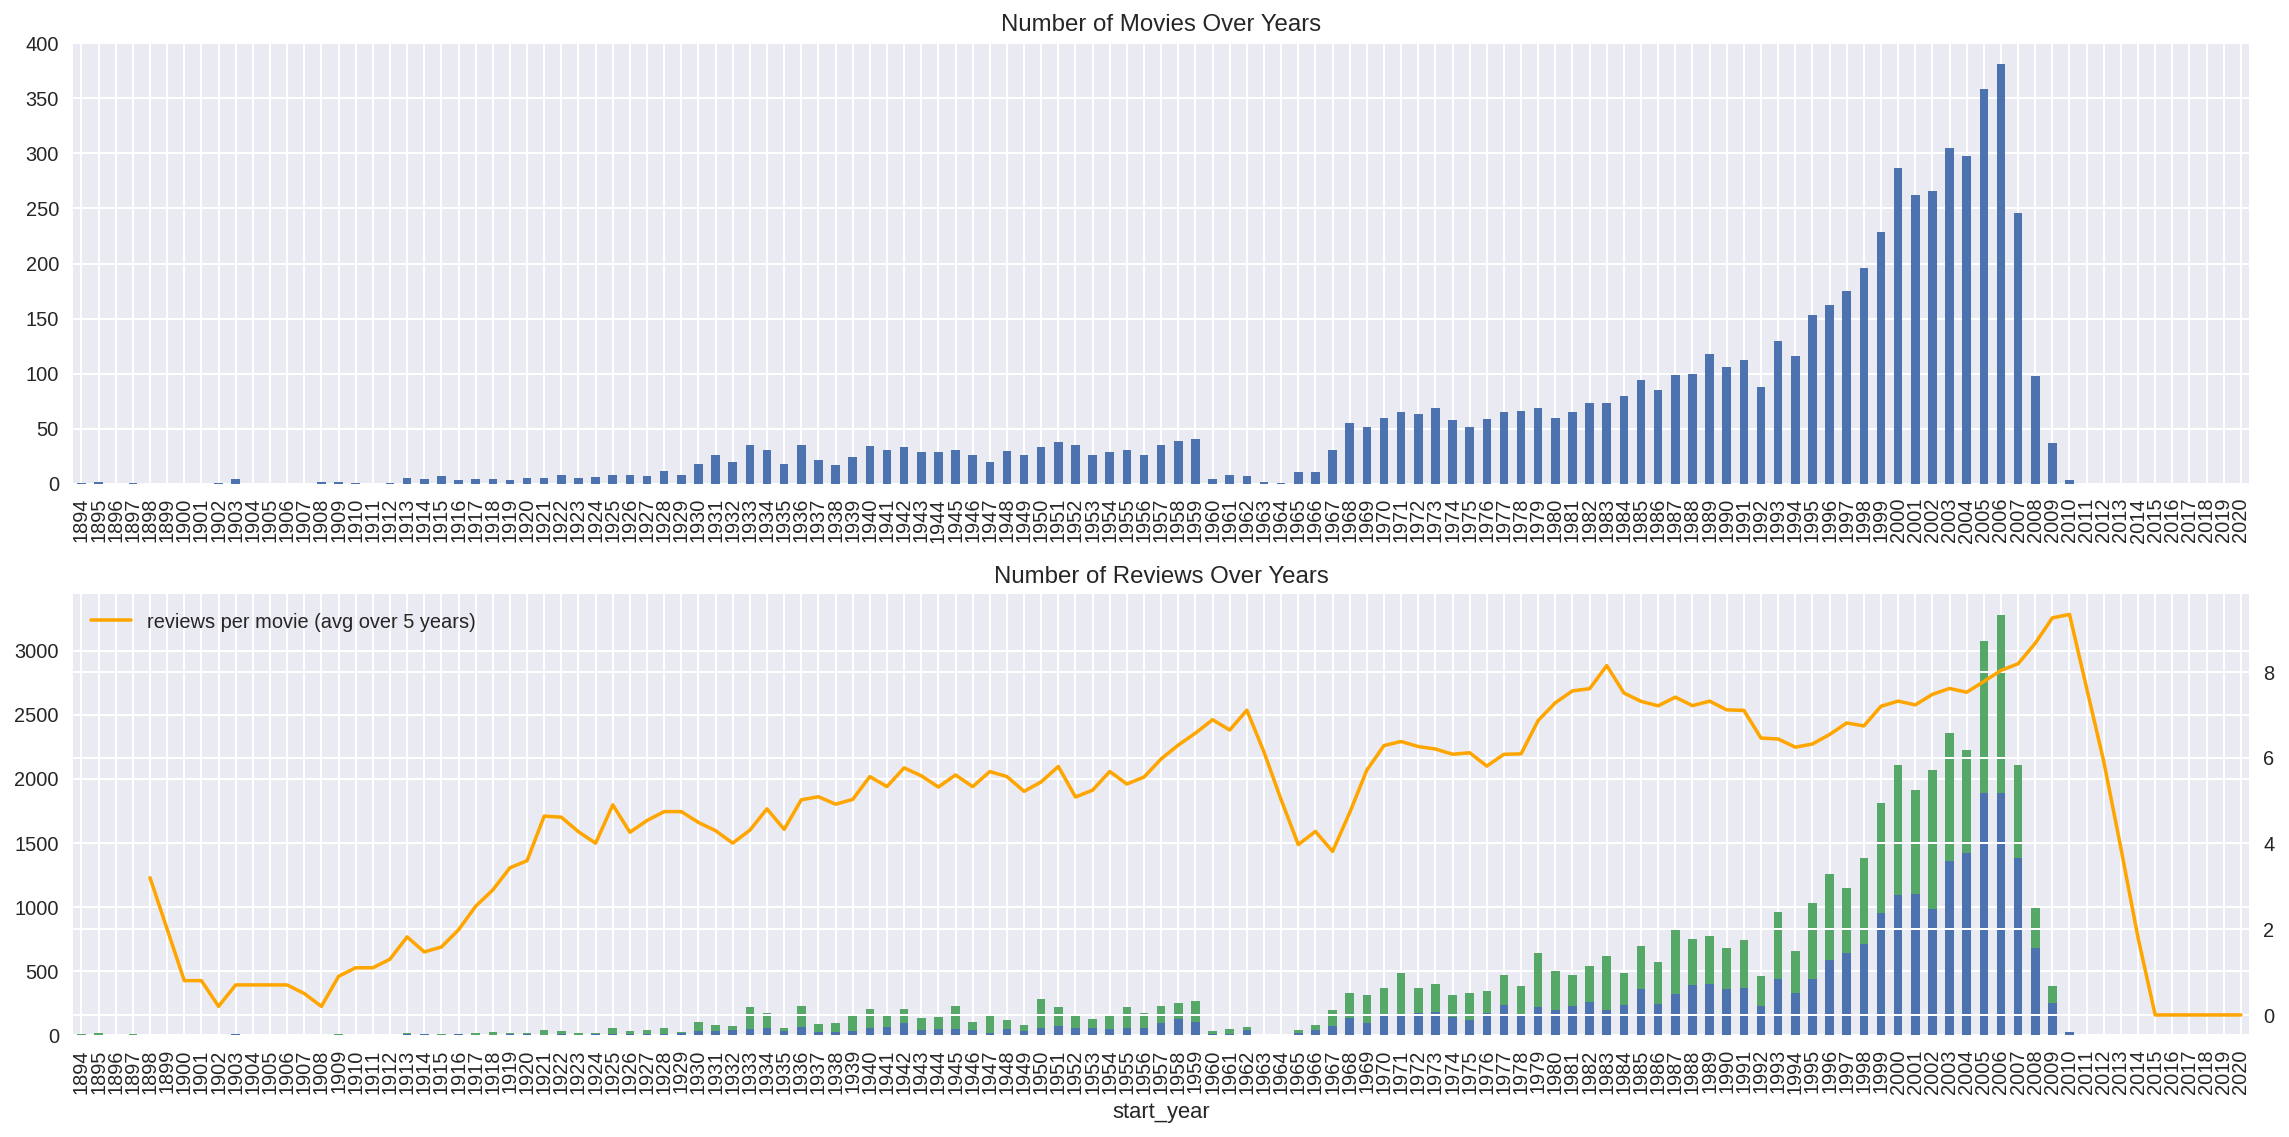

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

Historically over the years, the number of movies increases up until 2007. Consequently, the reviews per movie is between 250 and 3250 reviews.

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

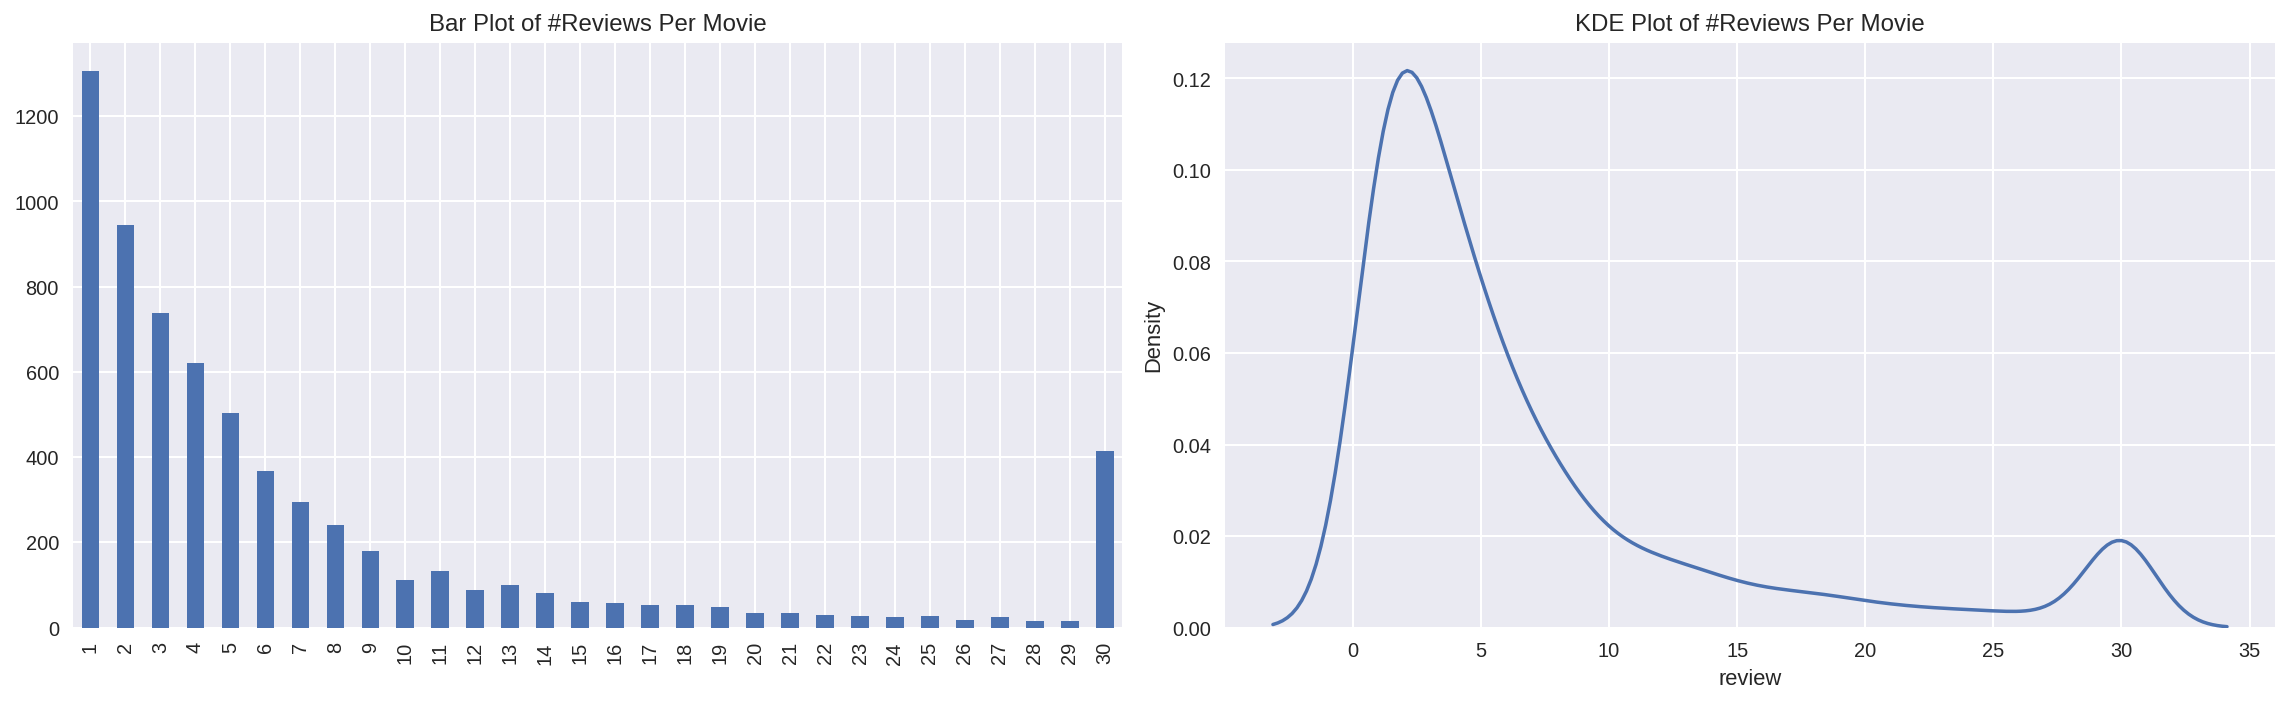

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()


The pos column contains class labels for each review. If the label is 0, then it is a negative review. If it is 1, then it is a positive review. Let's visualize and plot the distribution for the number of occurences of each label using a pie chart.

In [9]:
df_reviews['pos'].value_counts(normalize=True)

0    0.501046
1    0.498954
Name: pos, dtype: float64

From the pie chart, we can see that the labels are almost equally distributed between the two classes. There are 23616 positive reviews and 23715 negative reviews.

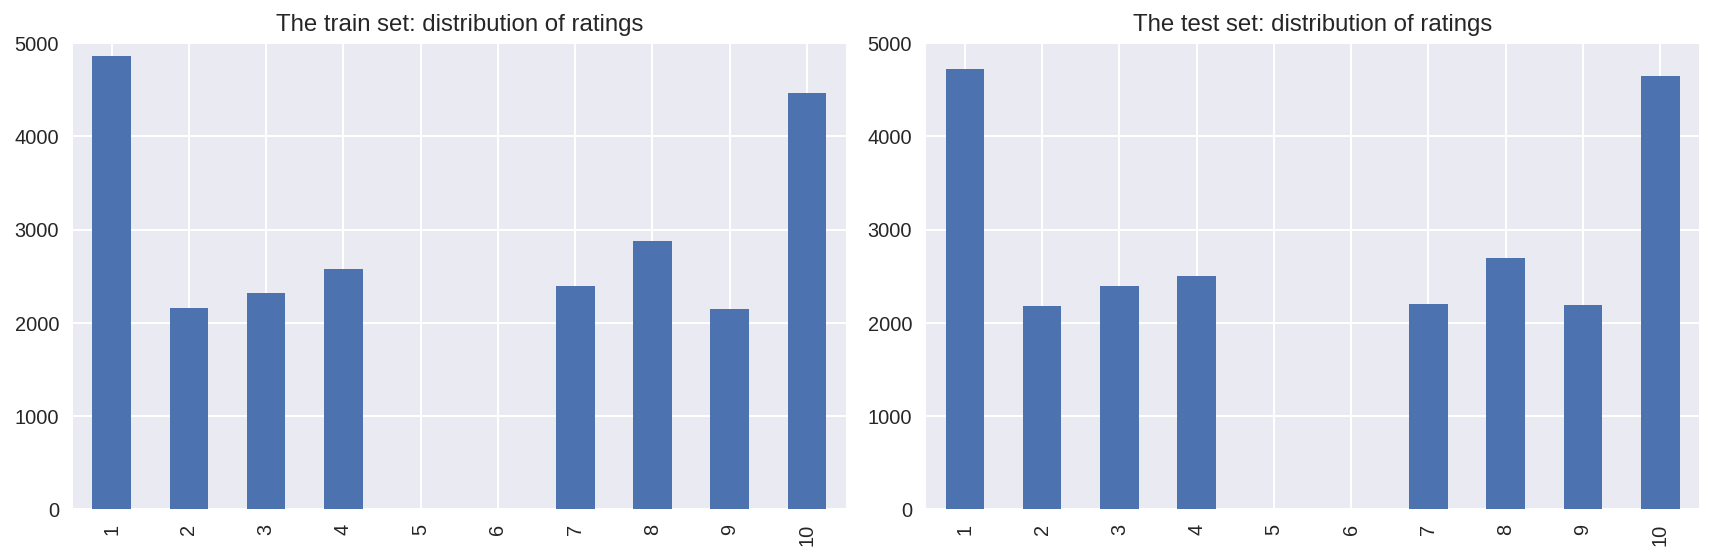

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

The train and the test data sets have approximately the same distribution of ratings. We can visaulize the distribution of negative and positive reviews over the years.

Distribution of negative and positive reviews over the years for two parts of the dataset

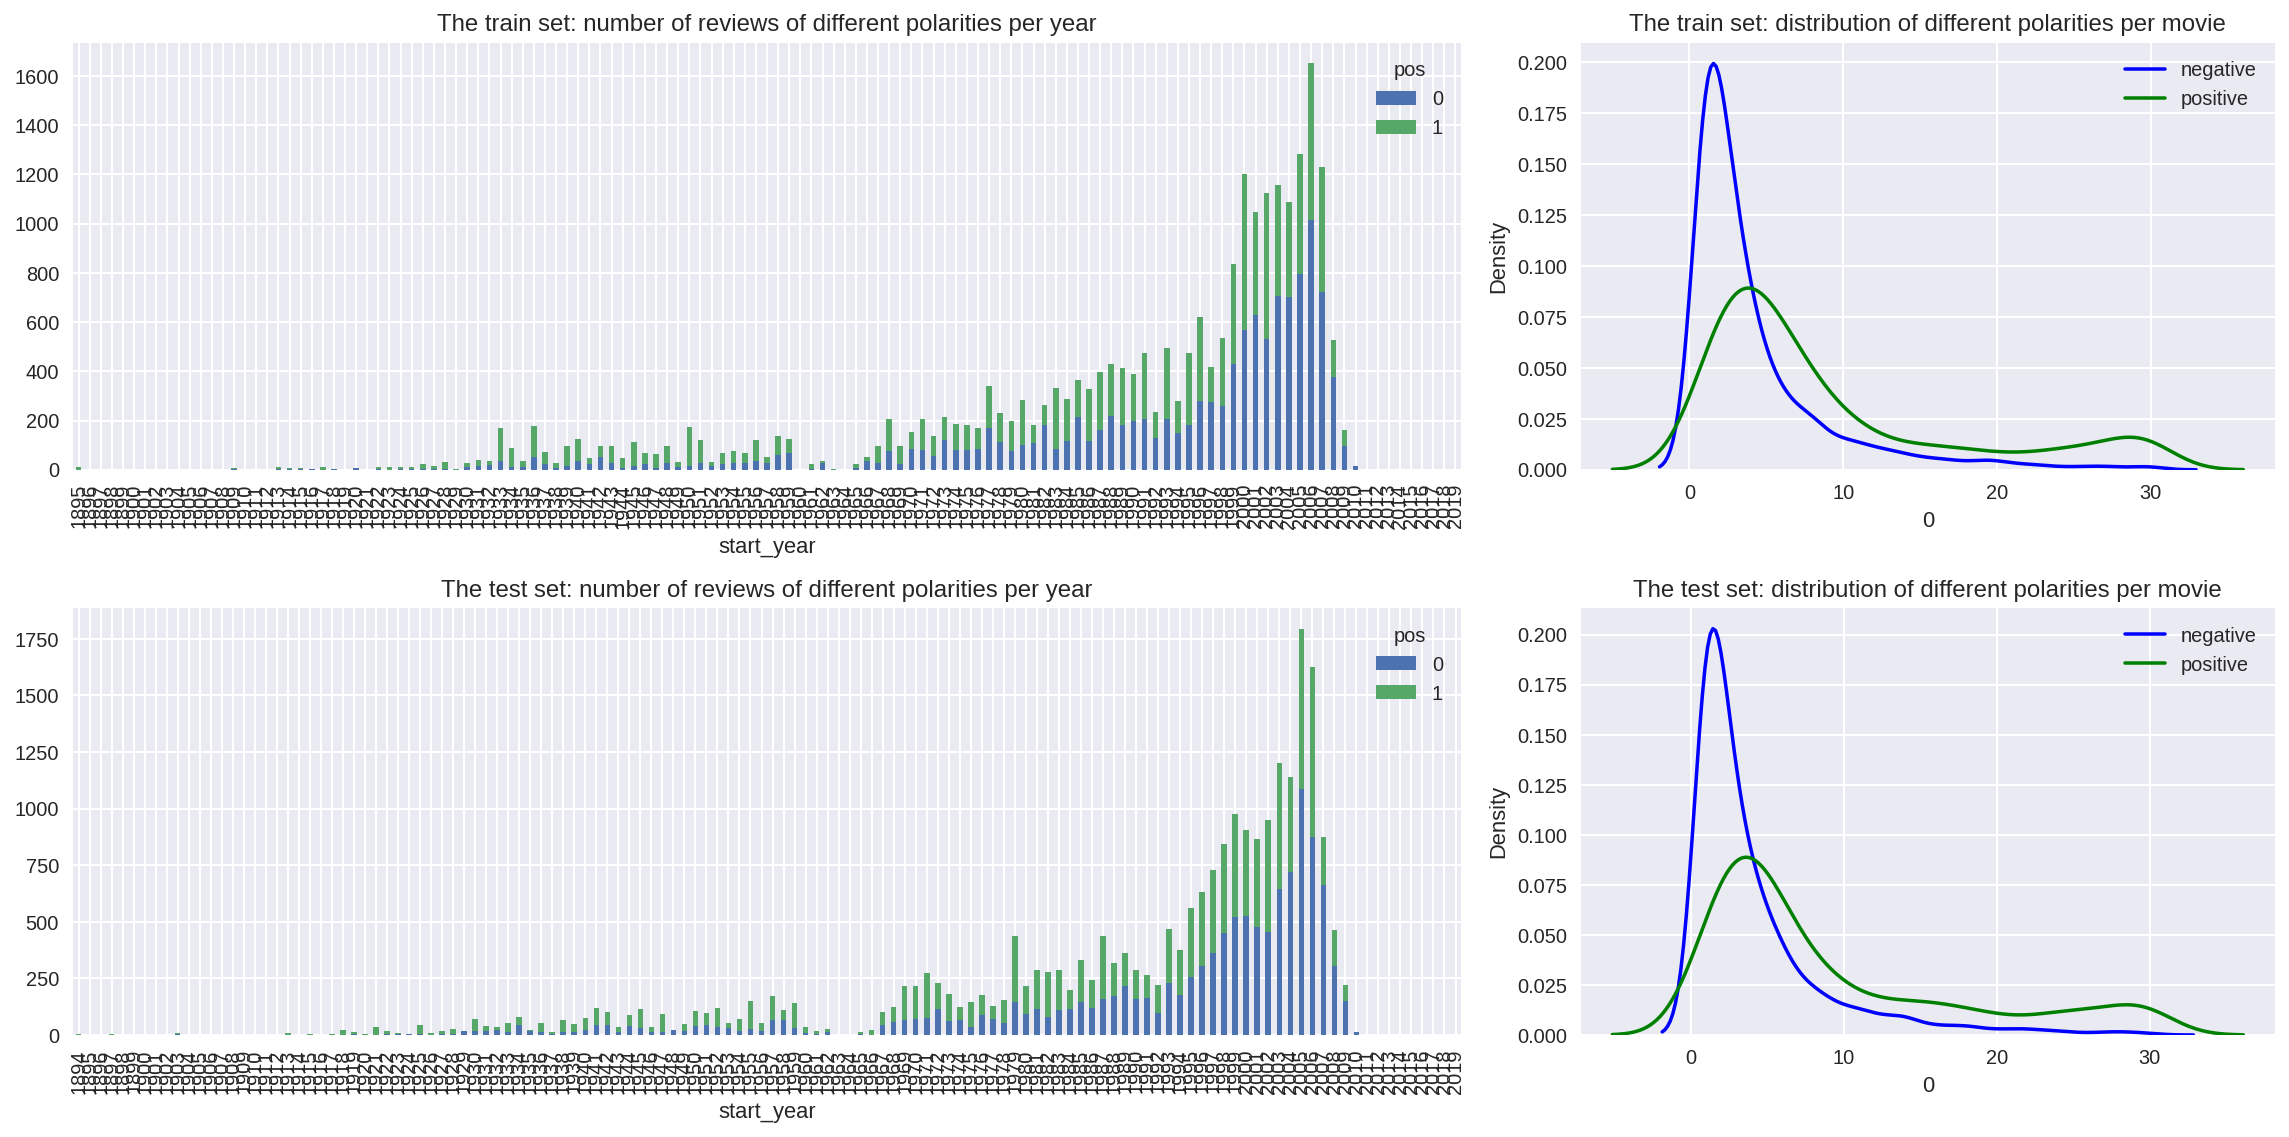

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [12]:
# function to evaluate classification models

import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [13]:
# function to clean the data

def clean_data(data):
    ''' 
    this function is used to clean 
    the data of non standard characters
    '''
    clean_data = re.sub(r"[^a-zA-Z']", " ", data)
    clean_data = " ".join(clean_data.split())
    return clean_data.lower()


In [14]:
df_reviews['review'] = df_reviews['review'].apply(clean_data)
df_reviews['review'].head()

0    the pakage implies that warren beatty and gold...
1    how the hell did they get this made presenting...
2    there is no real story the film seems more lik...
3    um a serious film about troubled teens in sing...
4    i'm totally agree with garryjohal from singapo...
Name: review, dtype: object

In [15]:
df_reviews['review_norm'] = df_reviews['review'].apply(clean_data)
df_reviews['review_norm']

0        the pakage implies that warren beatty and gold...
1        how the hell did they get this made presenting...
2        there is no real story the film seems more lik...
3        um a serious film about troubled teens in sing...
4        i'm totally agree with garryjohal from singapo...
                               ...                        
47326    this is another of my favorite columbos it spo...
47327    talk about being boring i got this expecting a...
47328    i never thought i'd say this about a biopic bu...
47329    spirit and chaos is an artistic biopic of miya...
47330    i'll make this brief this was a joy to watch i...
Name: review_norm, Length: 47331, dtype: object

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [16]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

target_train = df_reviews_train['pos']
target_test = df_reviews_test['pos']

features_train = df_reviews_train['review_norm']
features_test = df_reviews_test['review_norm']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Working with models

### Model 0 - Constant

In [17]:
from sklearn.dummy import DummyClassifier

In [18]:
%%time
# dummy classifier
dummy_clf = DummyClassifier()
dummy_clf.fit(features_train, target_train)

CPU times: user 1.54 ms, sys: 0 ns, total: 1.54 ms
Wall time: 1.39 ms


DummyClassifier()

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


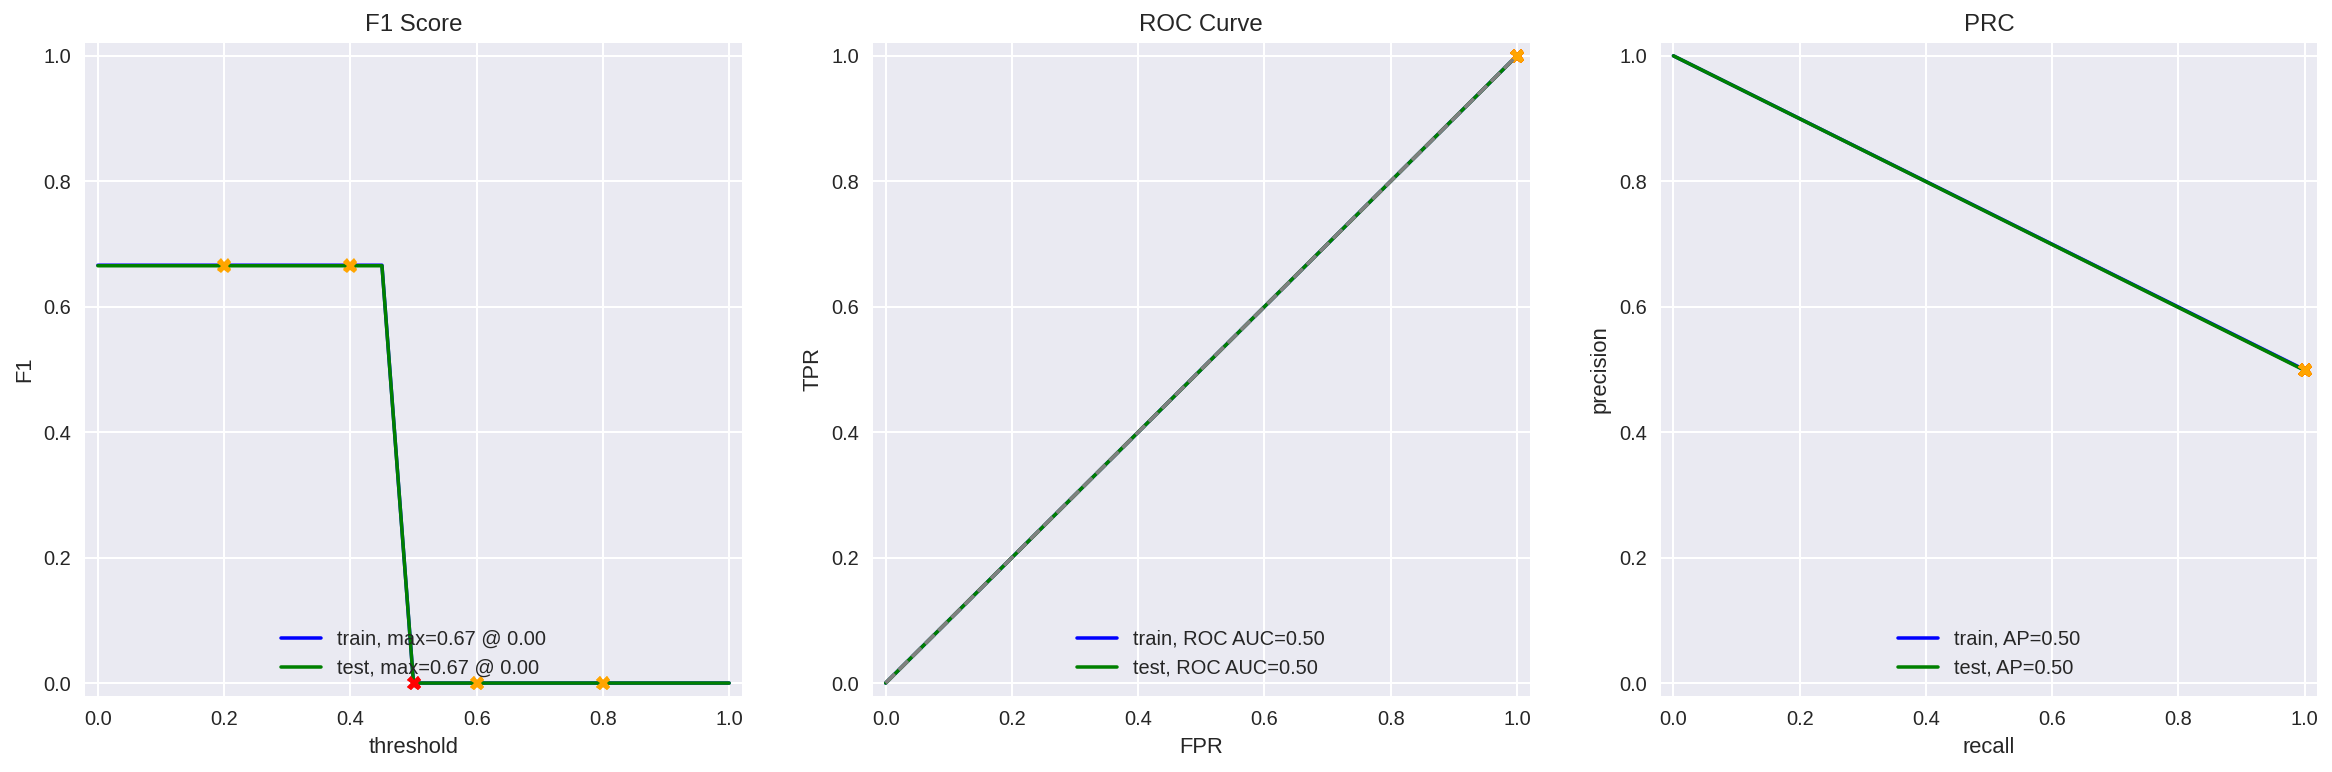

In [19]:
# evaluate dummy model
evaluate_model(dummy_clf, features_train, target_train, features_test, target_test)

### Model 1 - NLTK, TF-IDF and LR

TF-IDF

In [20]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [21]:
# text pre-processing with NLTK
stop_words = set(stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stop_words) # create a counter

# function to tokenize and lemmatize text using NLTK
def lemmatize_nltk(text):
    lemmatizer  = WordNetLemmatizer() # create a lemmatization object
    tokens = word_tokenize(text.lower()) # split text into tokens
    lemmas = [lemmatizer.lemmatize(token) for token in tokens] 
    lemmatized = " ".join(lemmas) 
    return lemmatized

In [22]:
# apply lemmatization to features
df_reviews_train['review_nltk'] = features_train.apply(lemmatize_nltk)


In [23]:
# apply lemmatization to features
df_reviews_test['review_nltk'] = features_test.apply(lemmatize_nltk)



In [24]:
# recalculate TF-IDF for train and test samples
nltk_X_train = count_tf_idf.fit_transform(df_reviews_train['review_nltk'])
nltk_X_test = count_tf_idf.transform(df_reviews_test['review_nltk'])

In [25]:
%%time
# train logistic regression model
logistic_clf = LogisticRegression(random_state=12345, solver='liblinear')
logistic_clf.fit(nltk_X_train, target_train)

CPU times: user 476 ms, sys: 340 ms, total: 816 ms
Wall time: 804 ms


LogisticRegression(random_state=12345, solver='liblinear')

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


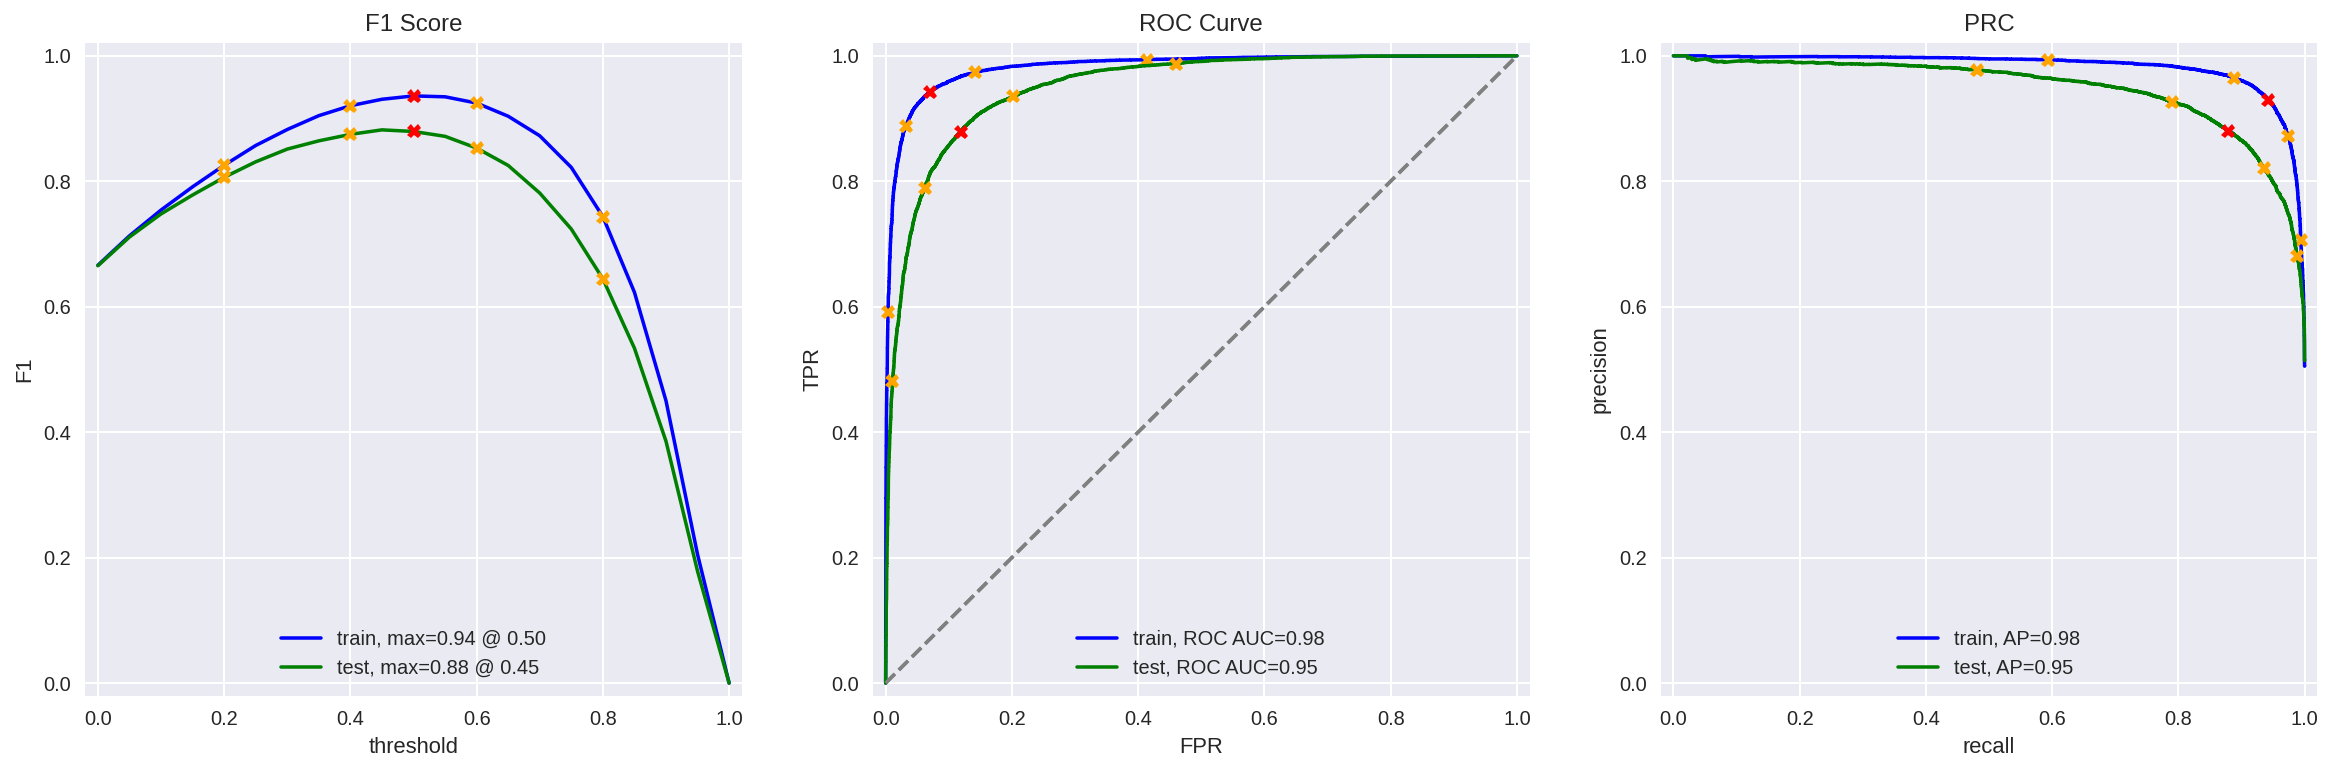

In [26]:
evaluate_model(logistic_clf, nltk_X_train, target_train, nltk_X_test, target_test)


### Model 2 - NLTK, TF-IDF and LightGBM Classifier

In [27]:
%%time
# train lightGBM classifier
lgbm_clf = lgb.LGBMClassifier(random_state=12345)
lgbm_clf.fit(nltk_X_train, target_train)

CPU times: user 27.1 s, sys: 92 ms, total: 27.2 s
Wall time: 28.2 s


LGBMClassifier(random_state=12345)

          train  test
Accuracy   0.92  0.86
F1         0.92  0.86
APS        0.97  0.93
ROC AUC    0.97  0.94


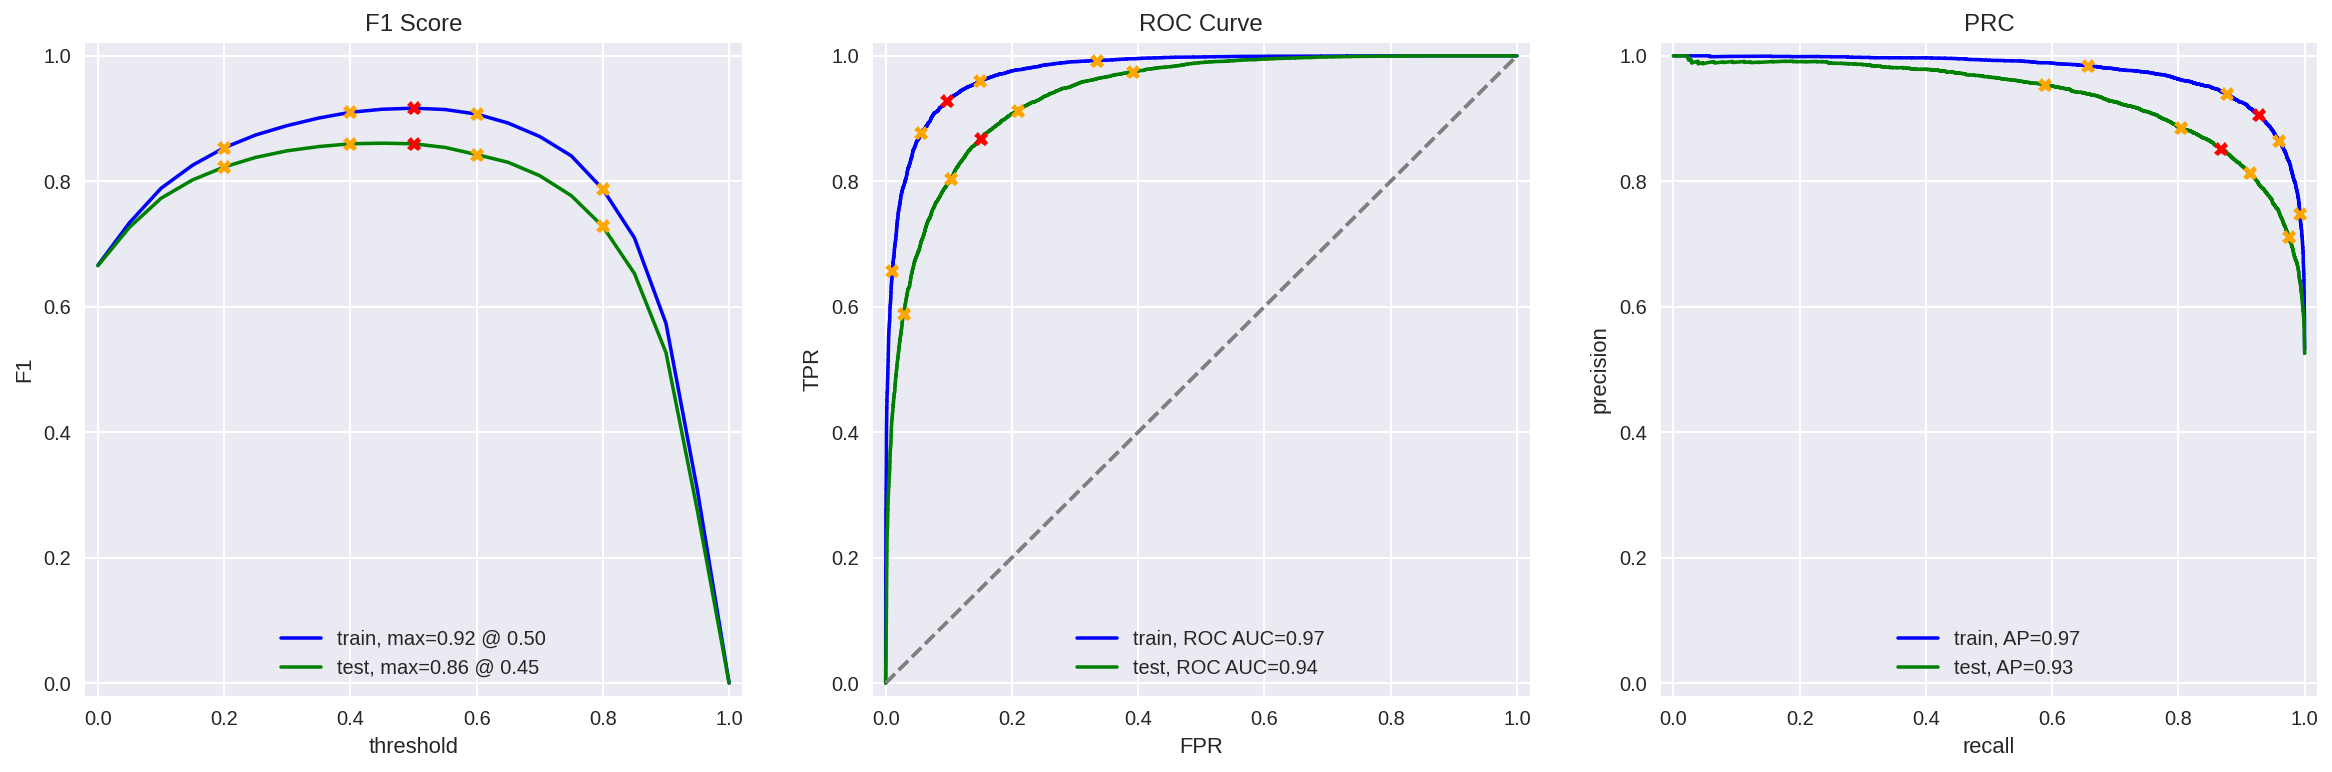

In [28]:
# evaluate lightGBM classifier model
evaluate_model(lgbm_clf, nltk_X_train, target_train, nltk_X_test, target_test)

### Model 3 - spaCy, TF-IDF and LR

In [29]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [30]:
# text pre-processing with spaCy
def lemmatize_spacy(text):
    doc = nlp(text.lower())
    lemmas = []
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    lemmas = [token.lemma_ for token in doc]
    lemmatize_spacy = " ".join(lemmas)
    return lemmatize_spacy

In [31]:
# apply lemmatization to features with spaCy
df_reviews_train['review_spacy'] = features_train.apply(lemmatize_spacy)


In [32]:
df_reviews_test['review_spacy'] = features_test.apply(lemmatize_spacy)


In [33]:
# recalculate TF-IDF for train and test samples
spacy_X_train = count_tf_idf.fit_transform(df_reviews_train['review_spacy'])
spacy_X_test = count_tf_idf.transform(df_reviews_test['review_spacy'])

In [34]:
%%time
# train logistic regression model
logistic_clf_spacy = LogisticRegression(random_state=12345, solver='liblinear')
logistic_clf_spacy.fit(spacy_X_train, target_train)

CPU times: user 512 ms, sys: 320 ms, total: 832 ms
Wall time: 806 ms


LogisticRegression(random_state=12345, solver='liblinear')

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


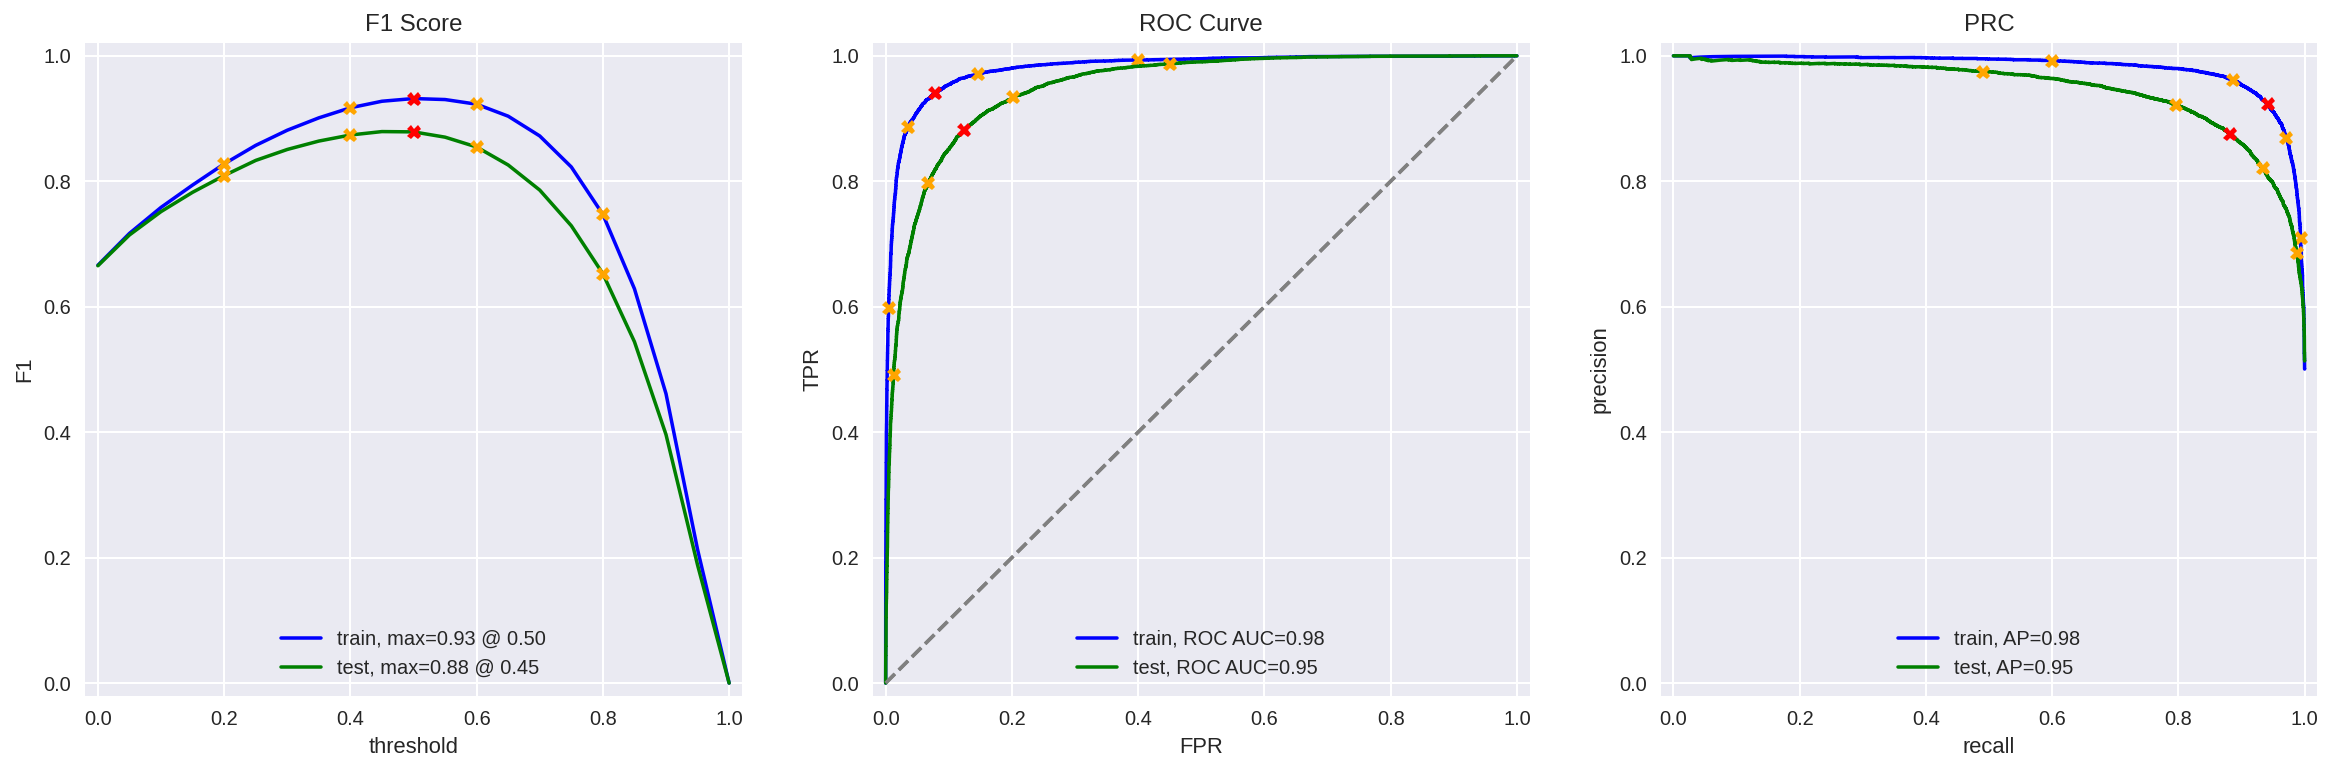

In [35]:
# evaluate logistic regression model
evaluate_model(logistic_clf_spacy, spacy_X_train, target_train, spacy_X_test, target_test)

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [36]:
from lightgbm import LGBMClassifier

In [37]:
%%time

# train lightGBM classifier
lgbm_clf_spacy = lgb.LGBMClassifier(random_state=12345)
lgbm_clf_spacy.fit(spacy_X_train, target_train)

CPU times: user 25 s, sys: 96 ms, total: 25.1 s
Wall time: 25.2 s


LGBMClassifier(random_state=12345)

          train  test
Accuracy   0.91  0.86
F1         0.91  0.86
APS        0.97  0.93
ROC AUC    0.97  0.94


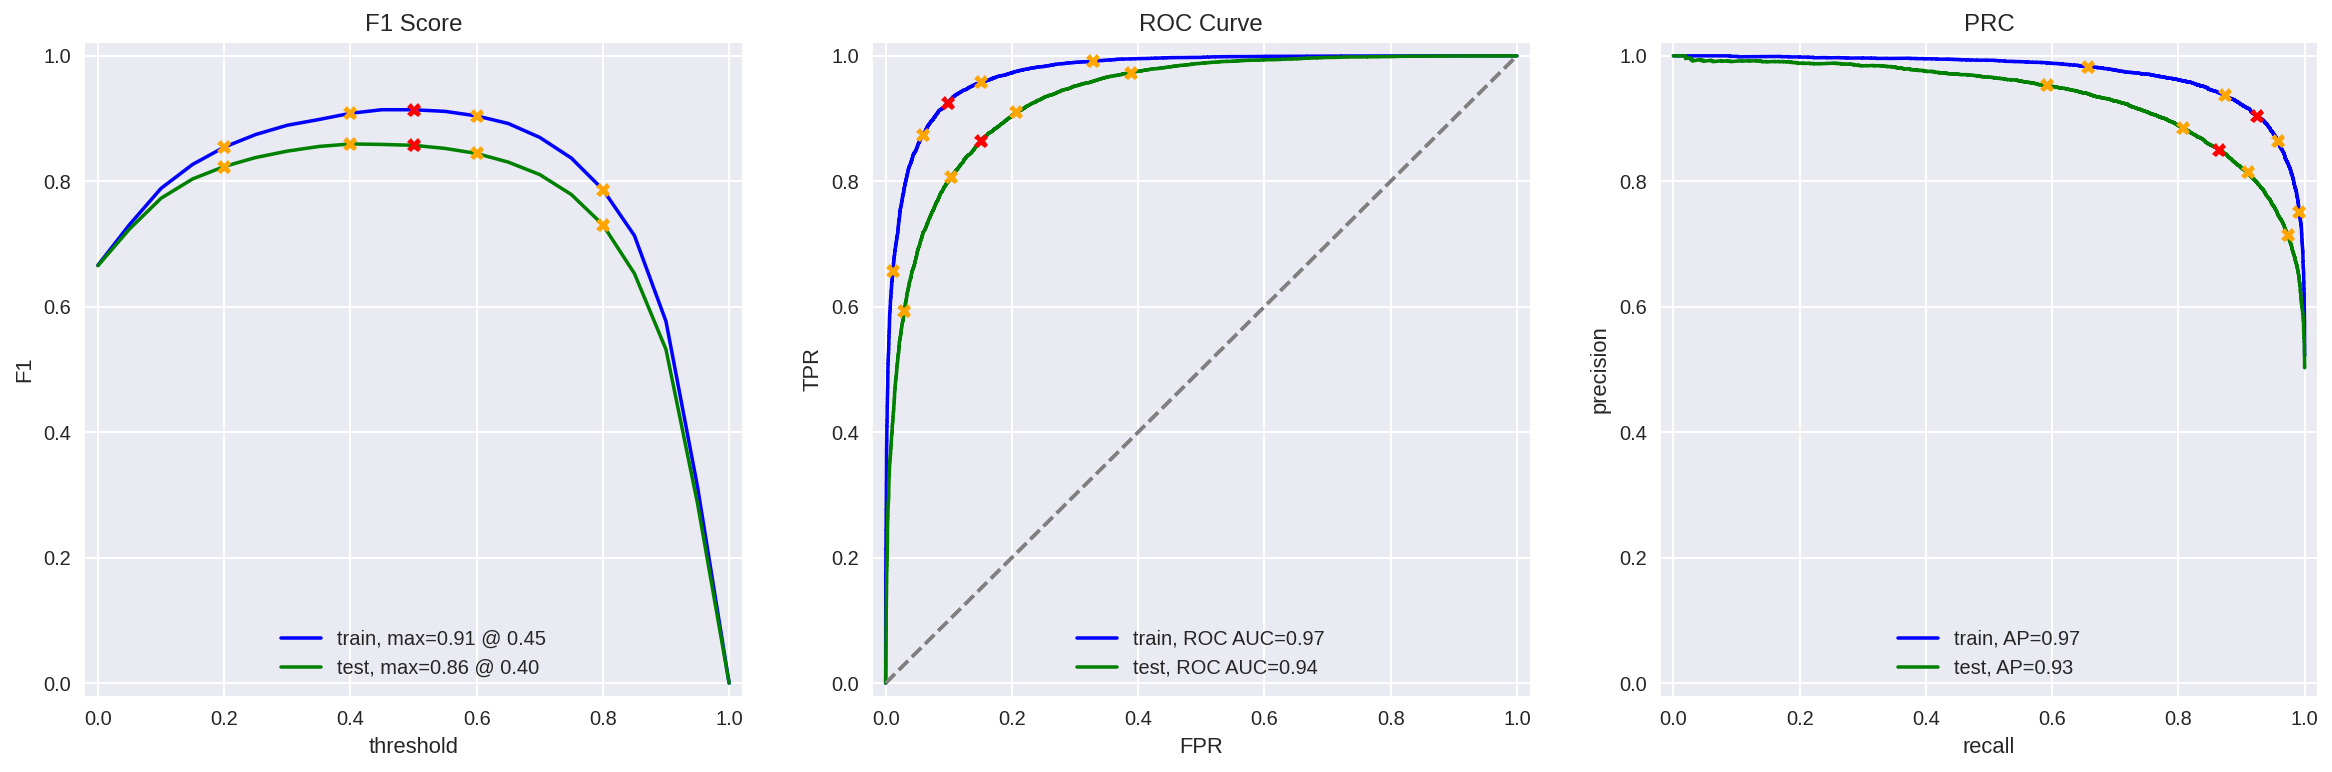

In [38]:
# evaluate lightGBM classifier model
evaluate_model(lgbm_clf_spacy, spacy_X_train, target_train, spacy_X_test, target_test)

###  Model 5 - BERT

In [39]:
# import torch
# import transformers

In [40]:
# # maximum sample size
# max_sample_size = 250

In [41]:
# tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
# config = transformers.BertConfig.from_pretrained('bert-base-uncased')
# model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [42]:
# def BERT_text_to_embeddings(texts, max_length=100, batch_size=25, force_device=None, disable_progress_bar=False):
    
#     ids_list = []
#     attention_mask_list = []

#     # text to padded ids of tokens along with their attention masks
    
#     # <put your code here to create ids_list and attention_mask_list>
    
#     if force_device is not None:
#         device = torch.device(force_device)
#     else:
#         device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
#     model.to(device)
#     if not disable_progress_bar:
#         print(f'Using the {device} device.')
    
#     # gettings embeddings in batches

#     embeddings = []

#     for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
#         ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
#         # <put your code here to create attention_mask_batch
            
#         with torch.no_grad():            
#             model.eval()
#             batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
#         embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
#     return np.concatenate(embeddings)

In [43]:
# %%time

# # Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours


# #BERT_train_features = BERT_text_to_embeddings(df_reviews_train, force_device='cpu')



In [44]:
#%%time

#test_features_5 = BERT_text_to_embeddings(df_reviews_test, force_device='cpu')


In [45]:
#print(df_reviews_train['review_norm'].shape)
#print(train_features_9.shape)
#print(train_target.shape)

In [46]:
# # if you have got the embeddings, it's advisable to save them to have them ready if 
# #np.savez_compressed('bert_features_5.npz', train_features_5=train_features_5, test_features_5=test_features_5)

# # and load...
# with np.load('bert_features_5.npz') as data:
#     train_features_5 = data['train_features_5']
#     test_features_5 = data['test_features_5']

In [47]:
# print(train_features_5.shape)
# print(train_target.shape)

In [48]:
# model_5 = LogisticRegression()
# model_5.fit(train_features_5,train_target)

In [49]:
# evaluate_model(model_5, 'M-5', train_features_5, train_target, test_features_5, test_target)
# Models.append(['BERT LR'])

## My Reviews

In [50]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(clean_data)# <put here the same normalization logic as for the main dataset>

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didn't expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...


### Model 1 Logistic Regression

In [51]:
texts = my_reviews['review_norm']

# make prediction with logistic regression classifier

log_pred = logistic_clf_spacy.predict(count_tf_idf.transform(texts))
log_pred_prob = logistic_clf_spacy.predict_proba(count_tf_idf.transform(texts))[:, 1]

# summarize the result
print(f'{sum(log_pred)} were predicted as positive out of {len(log_pred)} reviews.')
print('='*50)
print()
print('Pos:'+'  '+'Proba:'+'  '+'Actual review')
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{log_pred[i]:.2f}:  {review}')
    
    
    

1 were predicted as positive out of 8 reviews.

Pos:  Proba:  Actual review
0.00:  i did not simply like it not my kind of movie
0.00:  well i was bored and felt asleep in the middle of the movie
0.00:  i was really fascinated with the movie
0.00:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.00:  i didn't expect the reboot to be so good writers really cared about the source material
0.00:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.00:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
1.00:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 2 - LightGBM classifier

In [52]:
texts = my_reviews['review_norm']

# make predictions using lightGBM classifier
lgbm_pred = lgbm_clf_spacy.predict(count_tf_idf.transform(texts))
lgbm_pred_prob = lgbm_clf_spacy.predict_proba(count_tf_idf.transform(texts))[:, 1]

# summarize the result
print(f'{sum(lgbm_pred)} were predicted as positive out of {len(lgbm_pred)} reviews.')
print('='*50)
print()
print('Pos:'+'  '+'Proba:'+'  '+'Actual review')
for i, review in enumerate(my_reviews['review'].str.slice(0, 100)):
    print(f'  {lgbm_pred[i]}:   {lgbm_pred_prob[i]:.2f}:  {review}')

5 were predicted as positive out of 8 reviews.

Pos:  Proba:  Actual review
  1:   0.53:  I did not simply like it, not my kind of movie.
  0:   0.40:  Well, I was bored and felt asleep in the middle of the movie.
  1:   0.60:  I was really fascinated with the movie
  0:   0.47:  Even the actors looked really old and disinterested, and they got paid to be in the movie. What a so
  1:   0.77:  I didn't expect the reboot to be so good! Writers really cared about the source material
  1:   0.61:  The movie had its upsides and downsides, but I feel like overall it's a decent flick. I could see my
  0:   0.27:  What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even ki
  1:   0.80:  Launching on Netflix was a brave move & I really appreciate being able to binge on episode after epi


## Conclusions

The dataset was loaded and observed to have 47331 rows and 17 columns. The data was visualized using exploratory data analysis. Historically over the years, the number of movies increases up until 2007. The labels were almost equally distributed between the two classes with 23616 positive reviews and 23715 negative reviews.

The data was preprocessed by removing anything other than letters from texts, and converting words to lower case. The  data was lemmatized using NLTK and spaCy. The text data was vectorized using TF-IDF and BERT. For the sentiment analysis several different machine learning models such as  LightGBMClassifier, Logistic Regression and BERT were trained using different text preprocessing techniques. The two best performing algorithms that met the metrics requirement for an F1 score of 0.85 was LightGBMClassifier, Logistic Regression.